<a href="https://colab.research.google.com/github/AlessandraSalanitri/DataScienceProject/blob/main/Artificial_Neural_Network_(ANN)_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd

# Load processed dataset saved from Apriori analysis
df_cleaned = pd.read_csv("processed_medicine_data.csv")
print(df_cleaned.head())


                      substitute0             substitute1  \
0  Penciclav 500 mg/125 mg Tablet  Moxikind-CV 625 Tablet   
1         Zithrocare 500mg Tablet         Azax 500 Tablet   
2                 Solvin LS Syrup       Ambrodil-LX Syrup   
3                    Lcfex Tablet     Etofex 120mg Tablet   
4              Eralet 25mg Tablet                 Unknown   

               substitute2            substitute3              substitute4  \
0  Moxiforce-CV 625 Tablet     Fightox 625 Tablet  Novamox CV 625mg Tablet   
1          Zady 500 Tablet  Cazithro 500mg Tablet    Trulimax 500mg Tablet   
2        Zerotuss XP Syrup         Capex LS Syrup          Broxum LS Syrup   
3     Nexofex 120mg Tablet    Fexise 120mg Tablet     Histafree 120 Tablet   
4                  Unknown                Unknown                  Unknown   

                                                use0  \
0                  Treatment of Bacterial infections   
1                  Treatment of Bacterial infections

In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

encoder = LabelEncoder()

for col in df_cleaned.columns:
    df_cleaned[col] = encoder.fit_transform(df_cleaned[col].astype(str))

# Split into features (X) and labels (y)
X = df_cleaned.iloc[:, :-1]
y = df_cleaned.iloc[:, -1]

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data successfully preprocessed and split!")


Data successfully preprocessed and split!


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# ANN architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

print("ANN Training Completed!")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
6206/6206 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9952 - loss: 0.0193 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 2/20
6206/6206 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 1.0000 - loss: 4.7089e-04 - val_accuracy: 1.0000 - val_loss: 1.2610e-10
Epoch 3/20
6206/6206 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 1.0000 - loss: 3.6840e-04 - val_accuracy: 1.0000 - val_loss: 2.4468e-13
Epoch 4/20
6206/6206 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 1.0000 - loss: 1.8757e-08 - val_accuracy: 1.0000 - val_loss: 3.7348e-15
Epoch 5/20
6206/6206 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 1.0000 - loss: 3.1170e-09 - val_accuracy: 1.0000 - val_loss: 1.9787e-16
Epoch 6/20
6206/6206 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 1.0000 - loss: 4.4190e-10 - val_accuracy: 1.0000 - val_loss: 1.0097e-17
Epoch 7/20
6206/6206 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 1.0000 - loss: 1.5883e-10 - val_accuracy: 1.0000 - val_loss: 3.9669e-19
Epoch 8/20
6206/6206 ━━━━━━━━━━━━━━

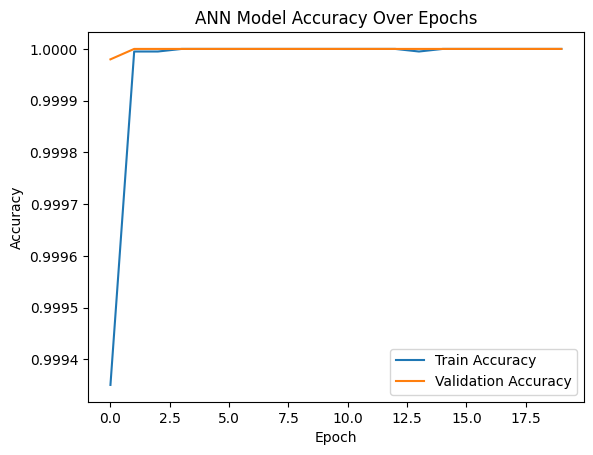

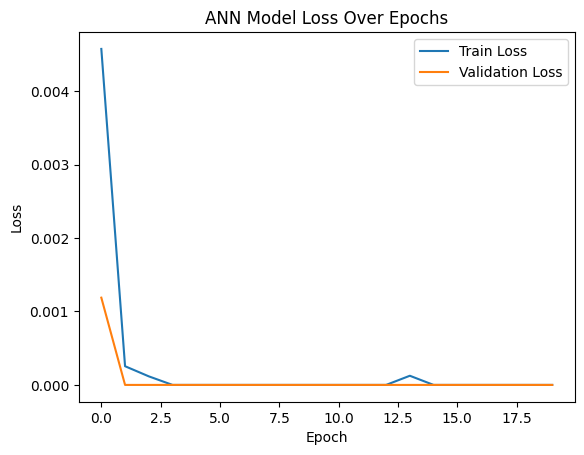

In [14]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("ANN Model Accuracy Over Epochs")
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("ANN Model Loss Over Epochs")
plt.show()


In [15]:
from sklearn.metrics import confusion_matrix, classification_report

# predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)  # convert probabilities to binary values

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


1552/1552 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Confusion Matrix:
 [[    1     0]
 [    0 49643]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00     49643

    accuracy                           1.00     49644
   macro avg       1.00      1.00      1.00     49644
weighted avg       1.00      1.00      1.00     49644

